# Finger 1

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ggplot


%matplotlib inline

plt.style.use('default') 
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid")

1) Analizar la distribución de postulaciones a avisos según la fecha, dia del mes, dia de la semana, etc. Algunas de las preguntas que podrían plantearse son: Se recibe un volumen de postulaciones similar cualquier dia de la semana? Existen variaciones según el mes del año, o aun dentro del mes? Etc.

In [2]:
postulaciones = pd.read_csv('data/fiuba_4_postulaciones.csv')
columns_rename = {'idaviso': 'id_aviso', 'idpostulante': 'idpostulante', 'fechapostulacion': 'fecha_postulacion'}
postulaciones = postulaciones.rename(columns=columns_rename)
postulaciones['fecha_postulacion']=pd.to_datetime(postulaciones['fecha_postulacion'])
postulaciones.head()

,id_aviso,idpostulante,fecha_postulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [3]:
#Chequeando si esta todo ok
postulaciones.isnull().any()

id_aviso             False
idpostulante         False
fecha_postulacion    False
dtype: bool

In [4]:
#Cuantos dias de postulaciones tenemos?
postulaciones['fecha_postulacion'].dt.date.value_counts().size

45

Distribución de postulaciones por dia de semana

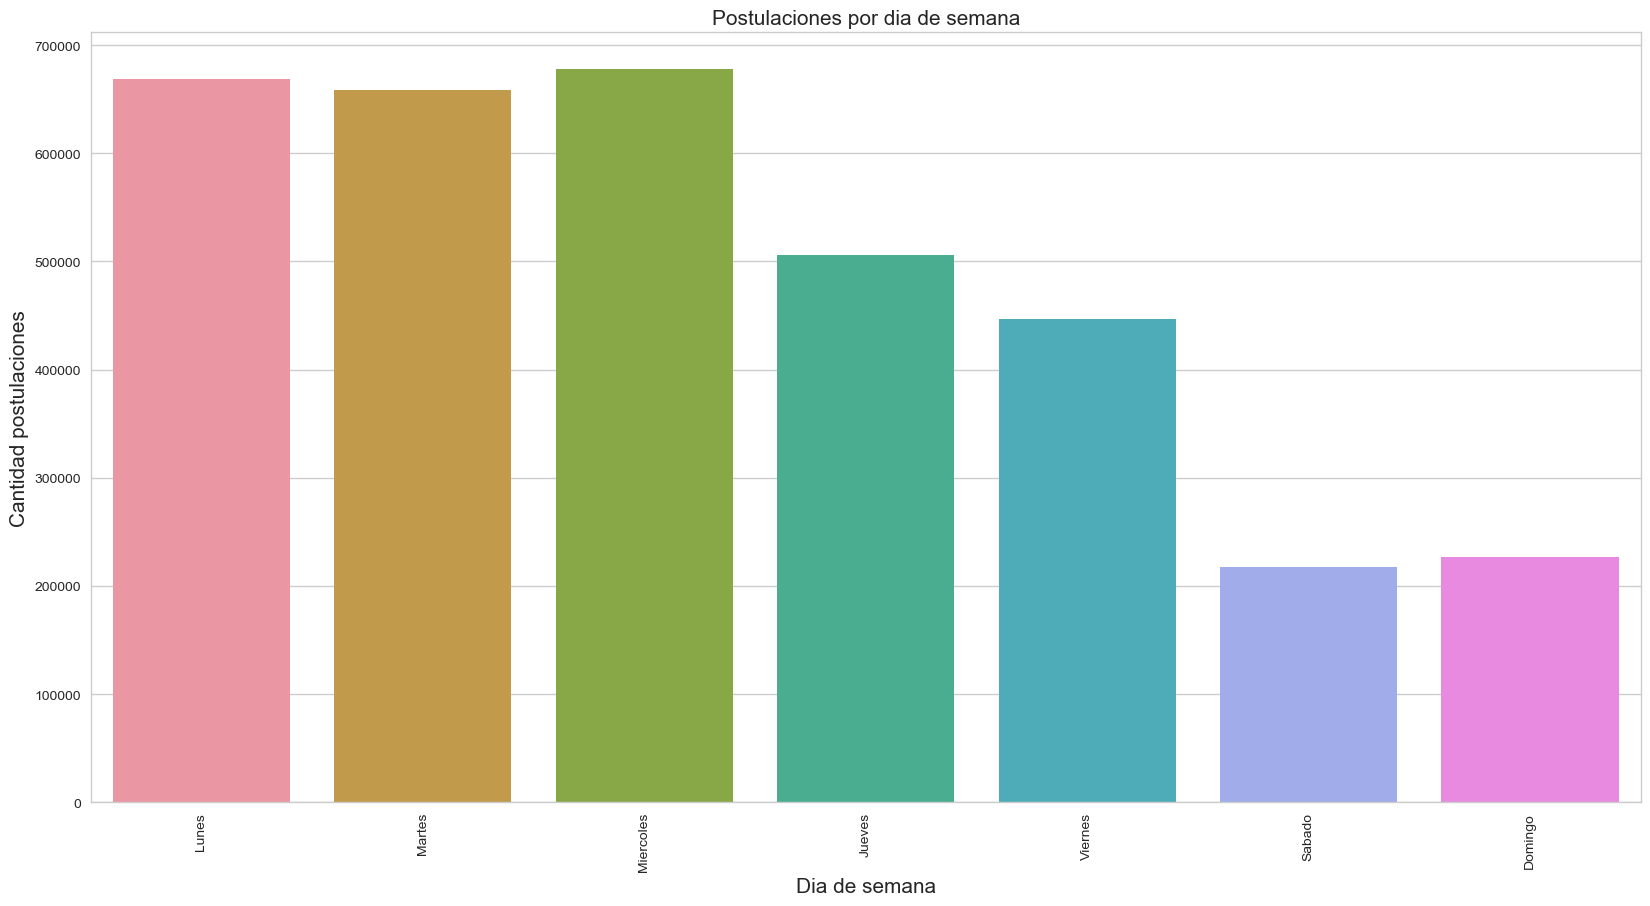

In [5]:
dayTranslation = {'Monday':'Lunes', 'Tuesday': 'Martes', 'Wednesday':'Miercoles', 'Thursday':'Jueves', 'Friday':'Viernes', 'Saturday':'Sabado', 'Sunday':'Domingo'}
postulaciones['dia_semana'] = postulaciones['fecha_postulacion'].dt.weekday_name.map(lambda x: dayTranslation[x])
g = sns.countplot(x='dia_semana', data=postulaciones, order=list(dayTranslation.values()), orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Dia de semana", fontsize=15)
g.set_ylabel("Cantidad postulaciones", fontsize=15)
g.set_title("Postulaciones por dia de semana", fontsize=15)

Vemos que los días Lunes, Martes y Miércoles son los dias en los que se realizan mayor cantidad de postulaciones.
Sábados y Domingos son los dias en que hay una menor cantidad de postulaciones.

Vamos a analizar la confiabilidad de los datos. Tenemos las postulaciones de 45 dias, queremos asegurarnos que
- No hay saltos de dias
- La cantidad de dias de la semana es pareja

Esto posiblemente no sume mucho en un informe, o deberia estar hecho fuera del informe.

In [6]:
days = pd.Series(list(postulaciones['fecha_postulacion'].dt.date.value_counts().index))

In [7]:
pd.to_datetime(days).dt.weekday_name.value_counts()

Monday       7
Tuesday      7
Wednesday    7
Thursday     6
Saturday     6
Sunday       6
Friday       6
dtype: int64

In [9]:
pd.to_datetime(days).dt.year.value_counts()

2018    45
dtype: int64

In [10]:
pd.to_datetime(days).dt.month.value_counts()

2    28
1    17
dtype: int64

In [11]:
pd.to_datetime(days).dt.day.value_counts().sort_index()

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    2
16    2
17    2
18    2
19    2
20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    1
30    1
31    1
dtype: int64

Los datos son desde el 15 de enero al 28 de Febrero del 2018. Tenemos 7 semanas de datos.

In [12]:
def get_week_label_for_january(day):
    if day<=20: return '01 - 3er sem ene'
    if day<=27: return '02 - 4ta sem ene'
    if day<=31: return '03 - 5ta sem ene'
    return '-'

def get_week_label_for_february(day):
    if day<=3: return '04 - 1er sem feb'
    if day<=10: return '05 - 2da sem feb'
    if day<=17: return '06 - 3er sem feb'
    if day<=24: return '07 - 4ta sem feb'
    if day<=28: return '08 - 5ta sem feb'
    return '-'

def get_week_label(date):
    if(date.month==1): return get_week_label_for_january(date.day)
    return get_week_label_for_february(date.day)

postulaciones['semana'] = postulaciones['fecha_postulacion'].map(get_week_label)

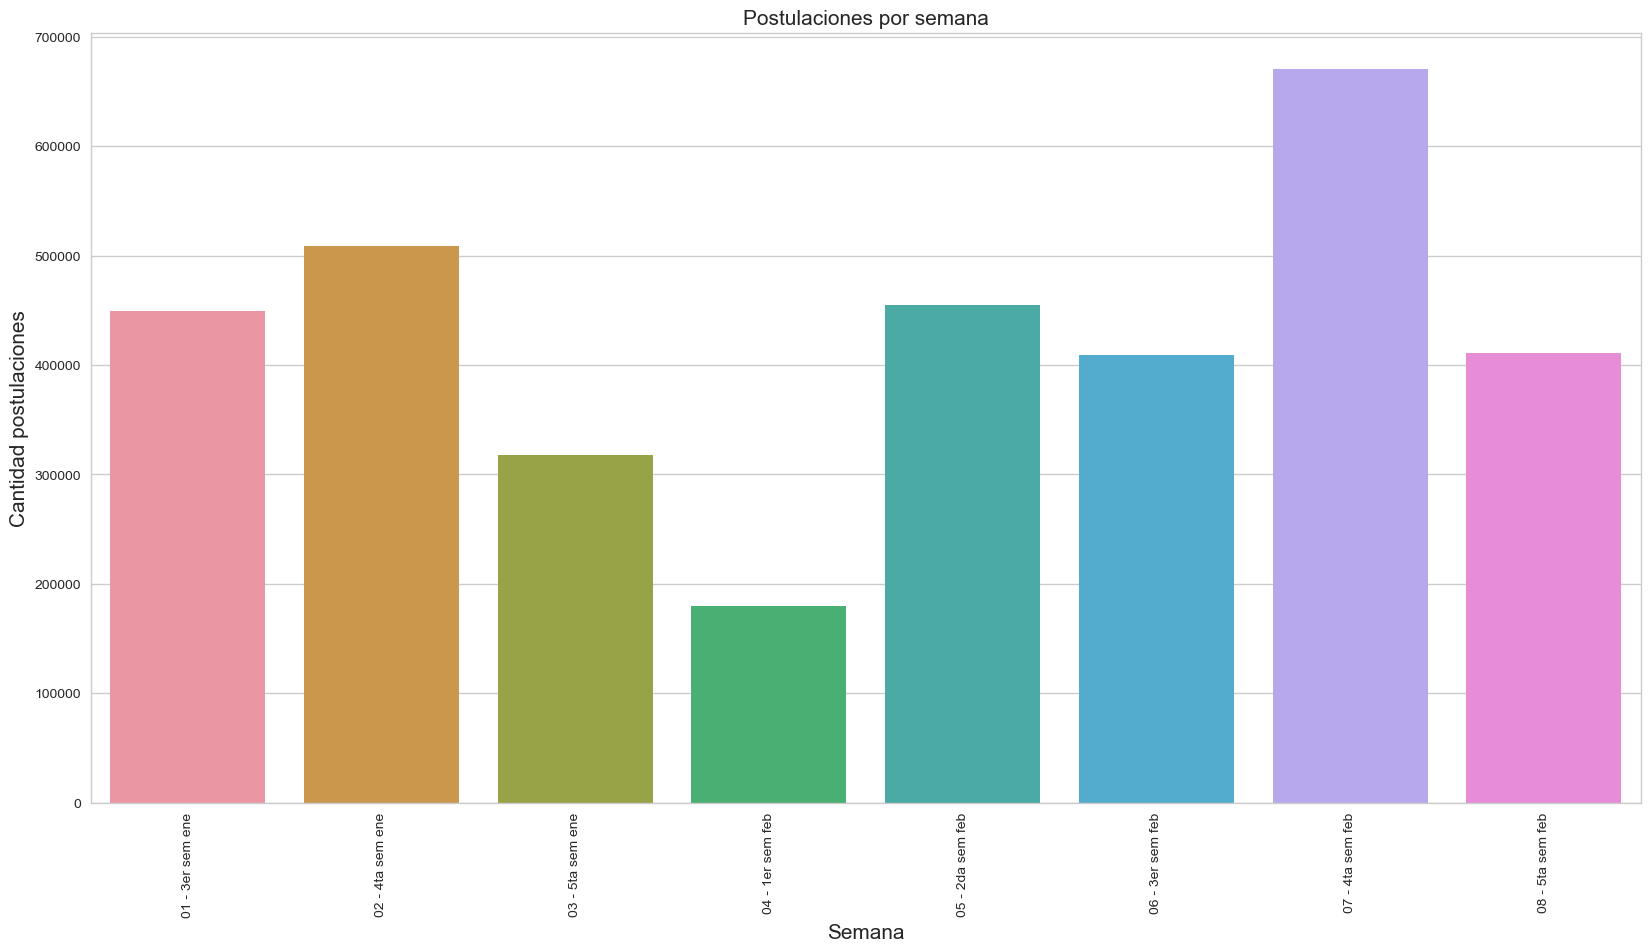

In [13]:
week_label_order = ['01 - 3er sem ene', '02 - 4ta sem ene', '03 - 5ta sem ene', '04 - 1er sem feb', '05 - 2da sem feb', '06 - 3er sem feb', '07 - 4ta sem feb', '08 - 5ta sem feb']
g = sns.countplot(x='semana', data=postulaciones, order=week_label_order, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Semana", fontsize=15)
g.set_ylabel("Cantidad postulaciones", fontsize=15)
g.set_title("Postulaciones por semana", fontsize=15)

La 4ta semana de Febrero es la más popular de todas las semanas, es el momento en que todavía no fin de mes.

In [14]:
for_heatmap = postulaciones.pivot_table(index='semana', columns='dia_semana', values='id_aviso', aggfunc='count')
for_heatmap = for_heatmap[['Domingo', 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado']]

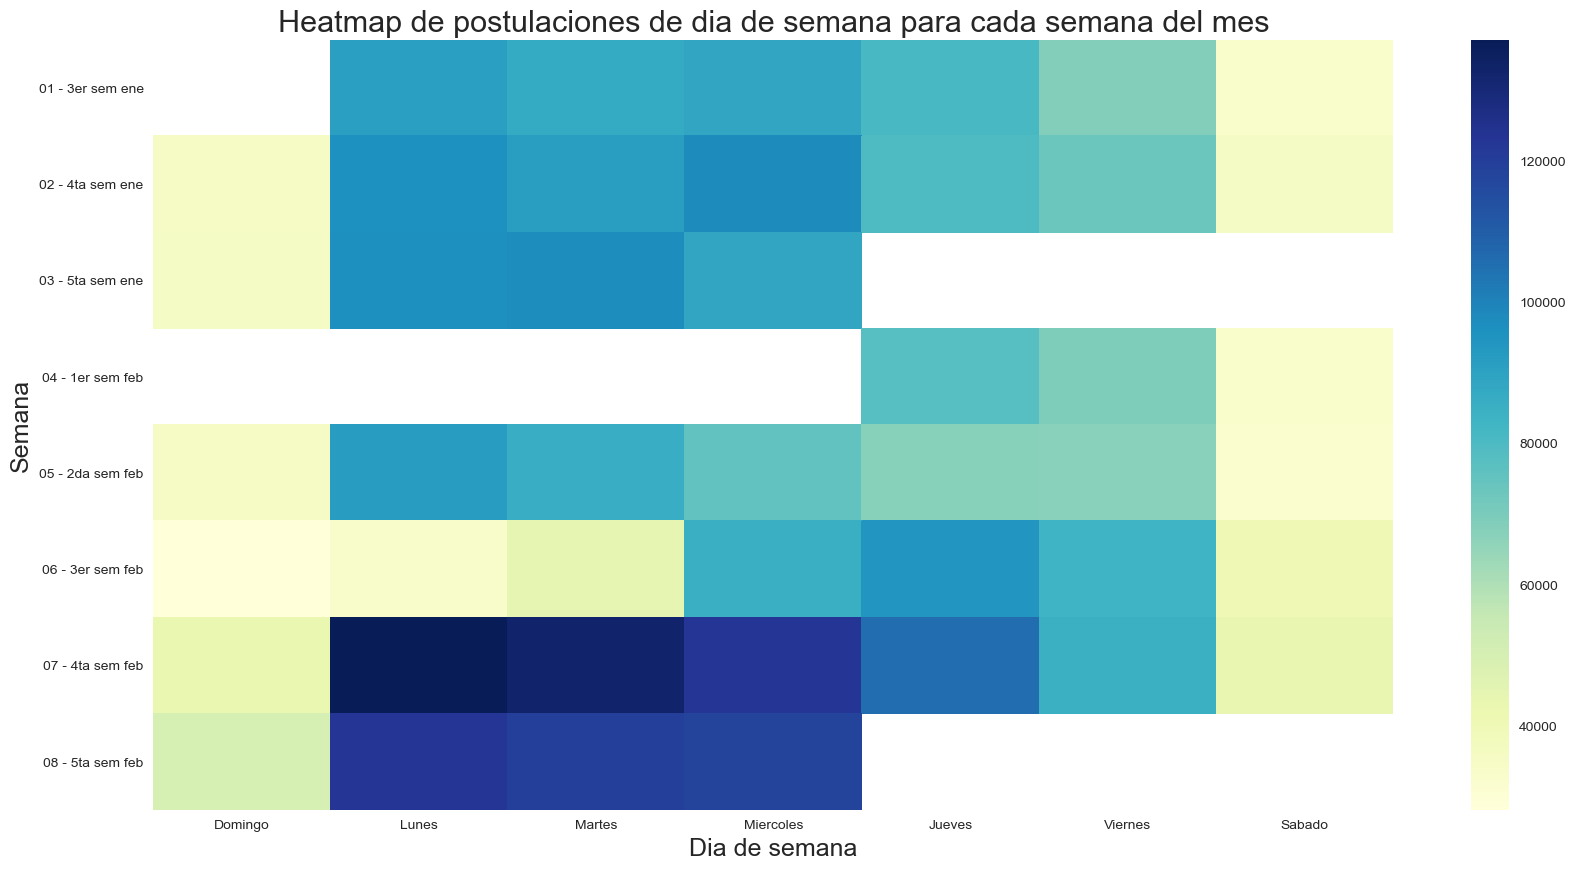

In [15]:
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Heatmap de postulaciones de dia de semana para cada semana del mes", fontsize=22)
g.set_xlabel("Dia de semana",fontsize=18)
g.set_ylabel("Semana", fontsize=18)

La distribución de postulaciones por dia de la semana es bastante homogenea. Se observan los siguientes patrones
- Las últimas dos semanas de cada mes son en las que hay mayor cantidad de postulaciones
- Si comparamos los dos meses del set de datos Febrero tiene una cantidad mayor de postulaciones
- En los dias Lunes 12 y Martes 13 de Febrero hay un demanda muy menor, que resulta raro para esos dias de semana que son los más populares y sobre todo en el mes de Febrero. Nos podríamos arriegar a decir que hubo algun problema tecnico, juego mis fichas a un release malo el Domingo 11 de Febrero por la noche...

In [16]:
postulaciones_lunes_febrero = postulaciones[postulaciones['fecha_postulacion'].dt.month==2]
postulaciones_lunes_febrero = postulaciones_lunes_febrero[postulaciones_lunes_febrero['fecha_postulacion'].dt.day>3]
postulaciones_lunes_febrero = postulaciones_lunes_febrero[postulaciones_lunes_febrero['dia_semana']=='Lunes']
postulaciones_lunes_febrero.semana.value_counts()

07 - 4ta sem feb    137104
08 - 5ta sem feb    122688
05 - 2da sem feb     91680
06 - 3er sem feb     33669
Name: semana, dtype: int64

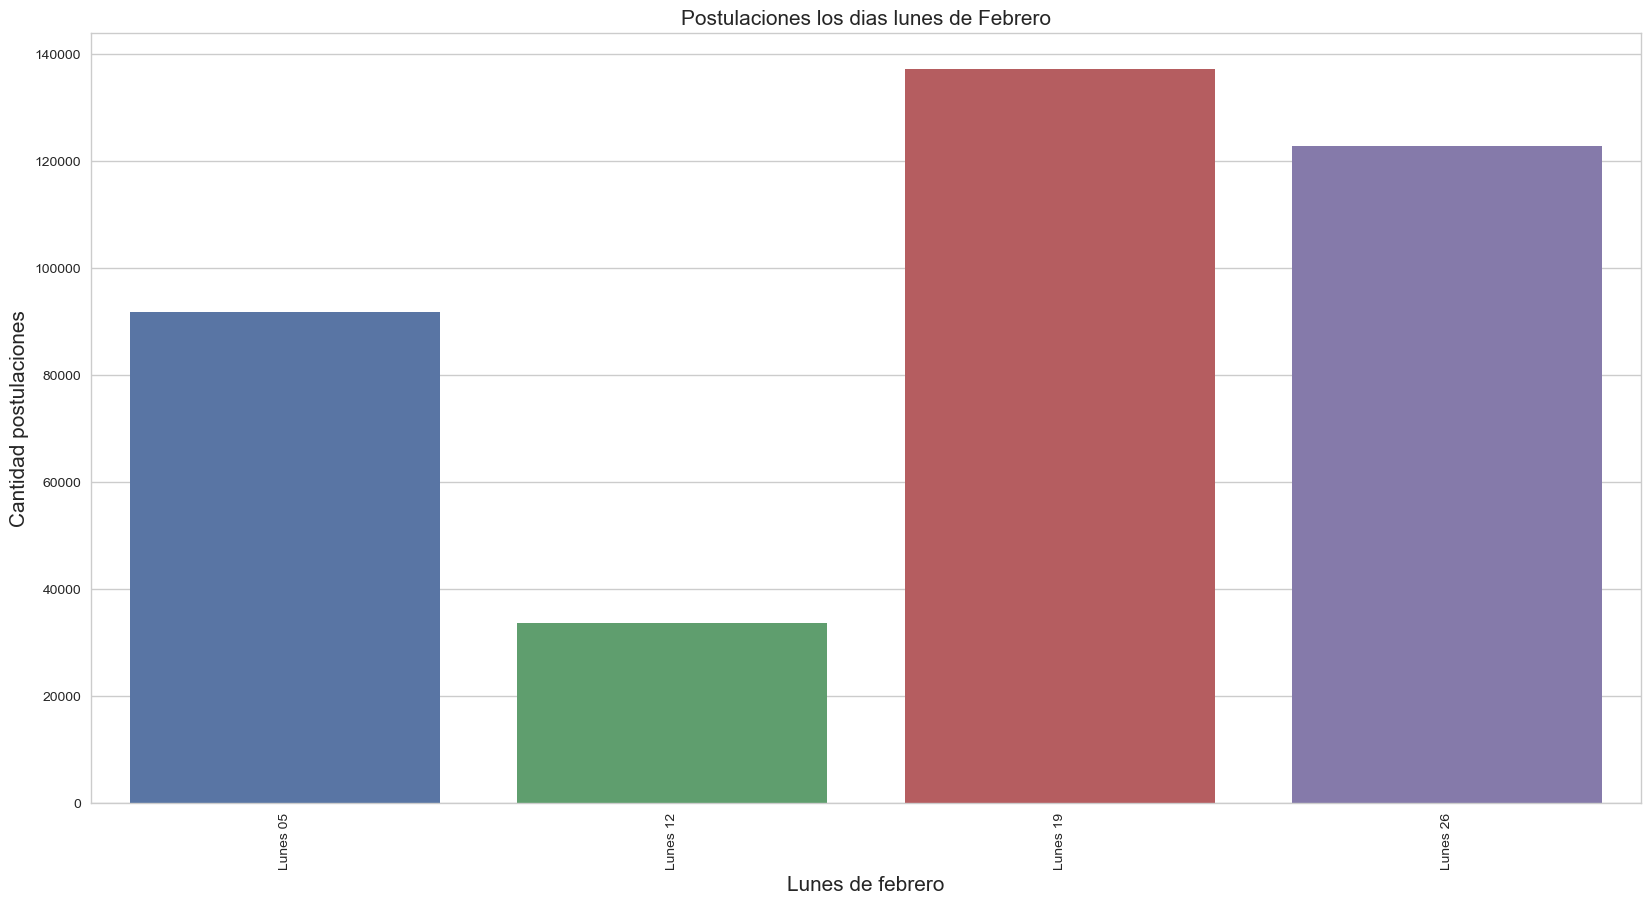

In [17]:
weekTranslation = {'05 - 2da sem feb':'Lunes 05', '06 - 3er sem feb':'Lunes 12', '07 - 4ta sem feb':'Lunes 19', '08 - 5ta sem feb':'Lunes 26'}
postulaciones_lunes_febrero['semana'] = postulaciones_lunes_febrero['semana'].map(lambda x: weekTranslation[x])
g = sns.countplot(x='semana', data=postulaciones_lunes_febrero, order=['Lunes 05', 'Lunes 12', 'Lunes 19','Lunes 26'], orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_xlabel("Lunes de febrero", fontsize=15)
g.set_ylabel("Cantidad postulaciones", fontsize=15)
g.set_title("Postulaciones los dias lunes de Febrero", fontsize=15)

Que paso el Lunes 12 de Febrero? (que aburrido)

2) Averiguar cuál es área de trabajo (nombre_area) sobre la cual se concentra mayor cantidad de ofertas laborales, y dentro de esta área, cuál es la zona (nombre_zona) en donde hay mas demanda.  

In [31]:
avisos_detalle = pd.read_csv('data/fiuba_6_avisos_detalle.csv')
avisos_online = pd.read_csv('data/fiuba_5_avisos_online.csv')
avisos_online = pd.merge(avisos_online, avisos_detalle, on='idaviso', how='inner')

In [14]:
avisos_online.head()

,idaviso,nombre_area,nombre_zona
0,1112355872,Recepcionista,Gran Buenos Aires
1,1112335374,Producción,Gran Buenos Aires
2,1112374842,Comercial,Gran Buenos Aires
3,1111984070,Producto,Gran Buenos Aires
4,1111822480,Comercial,Gran Buenos Aires


In [32]:
avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [15]:
top_10_areas=avisos_online['nombre_area'].value_counts().head(10).index
top_10_avisos_online = avisos_online[avisos_online['nombre_area'].isin(top_10_areas)]

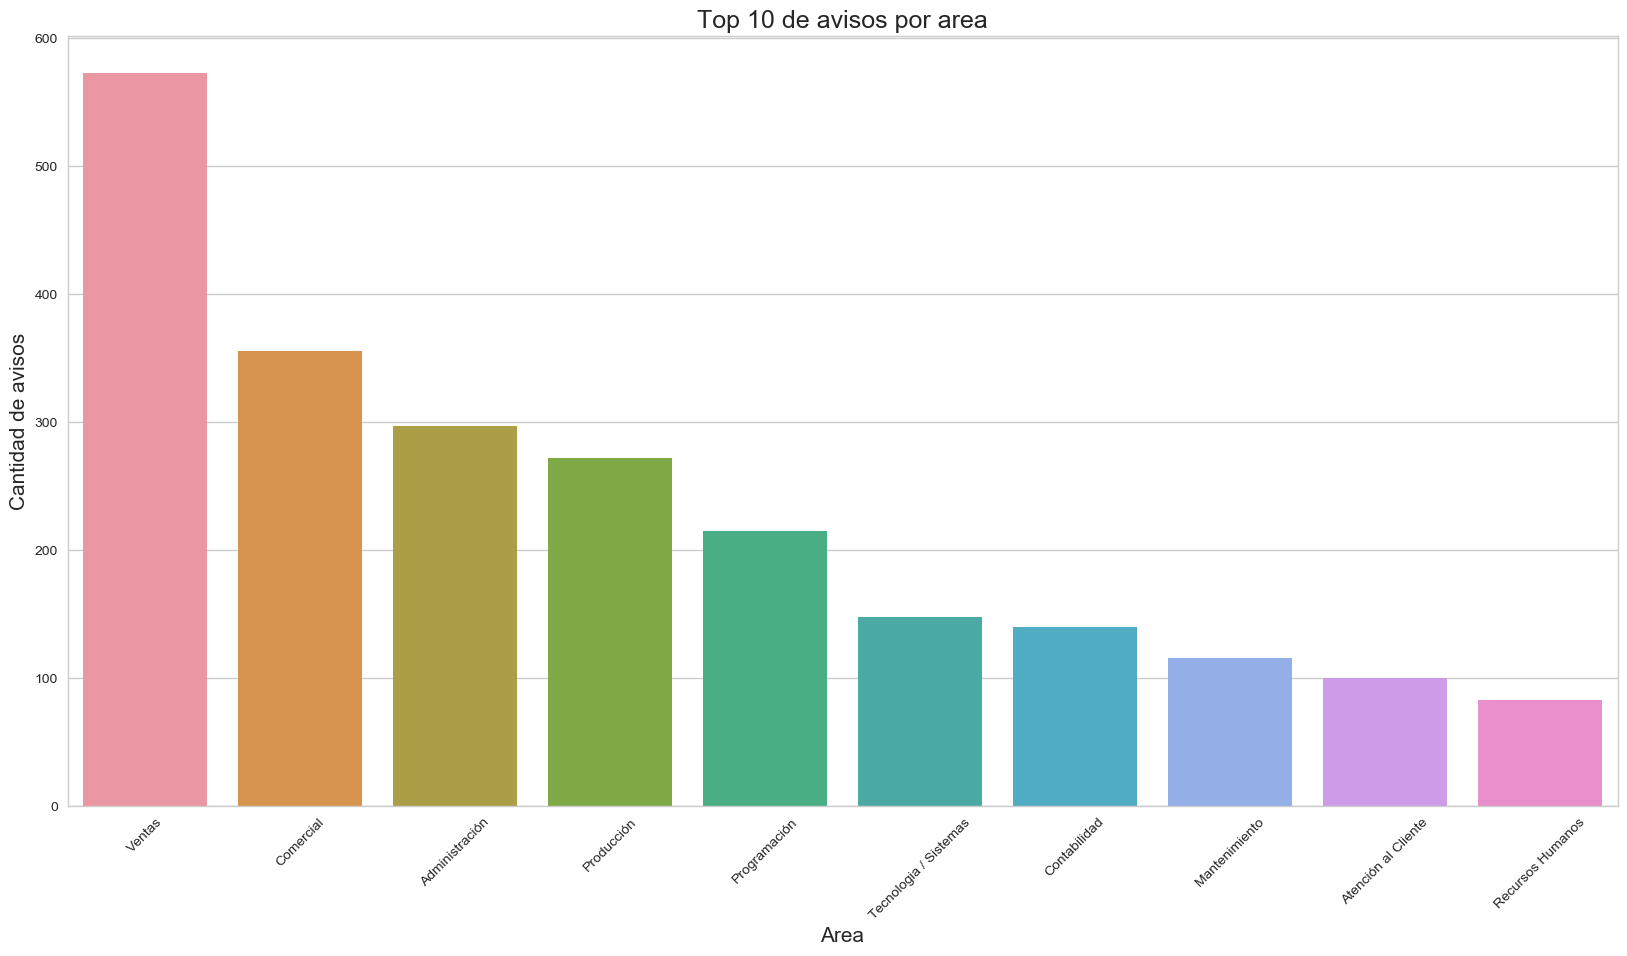

In [17]:
g = sns.countplot(x='nombre_area', data=top_10_avisos_online, order=top_10_areas, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Area", fontsize=15)
g.set_ylabel("Cantidad de avisos", fontsize=15)
g.set_title("Top 10 de avisos por area", fontsize=18)

In [18]:
columns_rename = {'idaviso': 'id_aviso', 'nombre_area': 'nombre_area'}
avisos_online = avisos_online.rename(columns=columns_rename)

In [19]:
demanda_avisos_online = pd.merge(avisos_online, postulaciones, on='id_aviso', how='inner')
demanda_avisos_online.head()

,id_aviso,nombre_area,nombre_zona,idpostulante,fecha_postulacion,dia_semana,semana
0,1112355872,Recepcionista,Gran Buenos Aires,ZPWlE,2018-02-22 13:38:32,Jueves,07 - 4ta sem feb
1,1112355872,Recepcionista,Gran Buenos Aires,NNvzeB,2018-02-24 15:23:23,Sabado,07 - 4ta sem feb
2,1112355872,Recepcionista,Gran Buenos Aires,5qvovM,2018-02-24 13:30:45,Sabado,07 - 4ta sem feb
3,1112355872,Recepcionista,Gran Buenos Aires,Zrx8Xz,2018-02-26 07:57:33,Lunes,08 - 5ta sem feb
4,1112355872,Recepcionista,Gran Buenos Aires,5PE0Vz,2018-02-27 17:18:52,Martes,08 - 5ta sem feb


In [20]:
demanda_avisos_online_ventas = demanda_avisos_online[demanda_avisos_online['nombre_area']=='Ventas']
demanda_avisos_online_ventas['nombre_zona'].value_counts()

Gran Buenos Aires    164938
Capital Federal        8113
Name: nombre_zona, dtype: int64

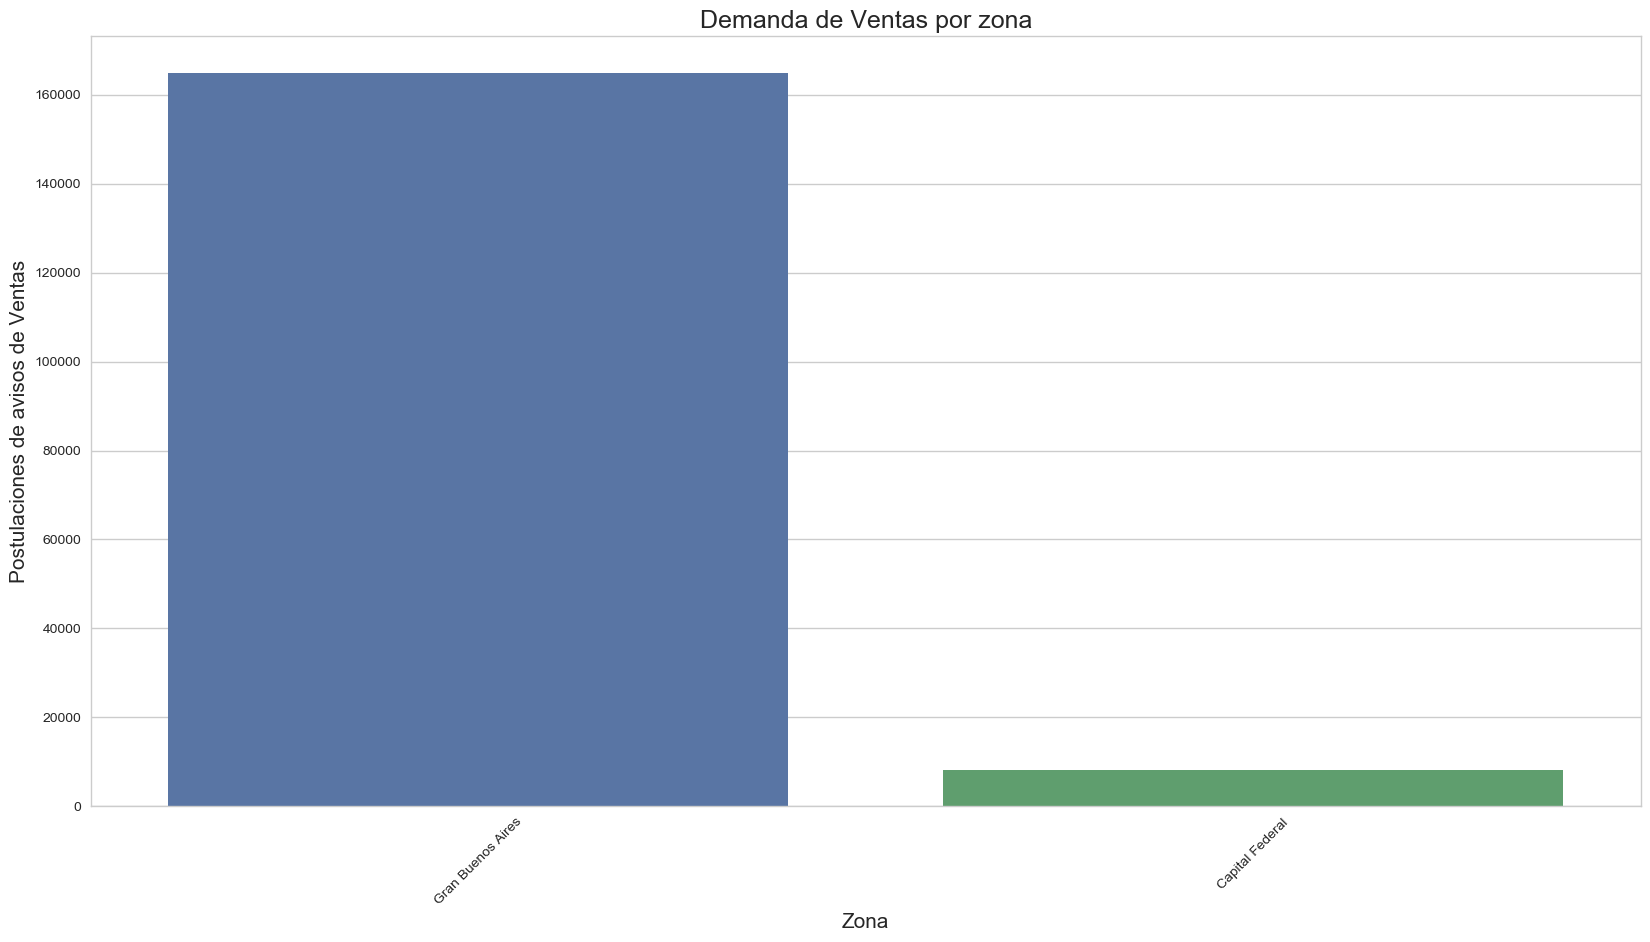

In [21]:
g = sns.countplot(x='nombre_zona', data=demanda_avisos_online_ventas, order=demanda_avisos_online_ventas['nombre_zona'].value_counts().index, orient='v')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Zona", fontsize=15)
g.set_ylabel("Postulaciones de avisos de Ventas", fontsize=15)
g.set_title("Demanda de Ventas por zona", fontsize=18)

In [22]:
demanda_avisos_online_top_10 = demanda_avisos_online[demanda_avisos_online['nombre_area'].isin(top_10_areas)]
for_heatmap = demanda_avisos_online_top_10.pivot_table(index='nombre_area', columns='nombre_zona', values='fecha_postulacion', aggfunc='count')

In [23]:
for_heatmap.head()

nombre_zona,Capital Federal,Gran Buenos Aires
nombre_area,,
Administración,7925,112083
Atención al Cliente,9421,66682
Comercial,4373,90236
Contabilidad,613,21848
Mantenimiento,148,11330


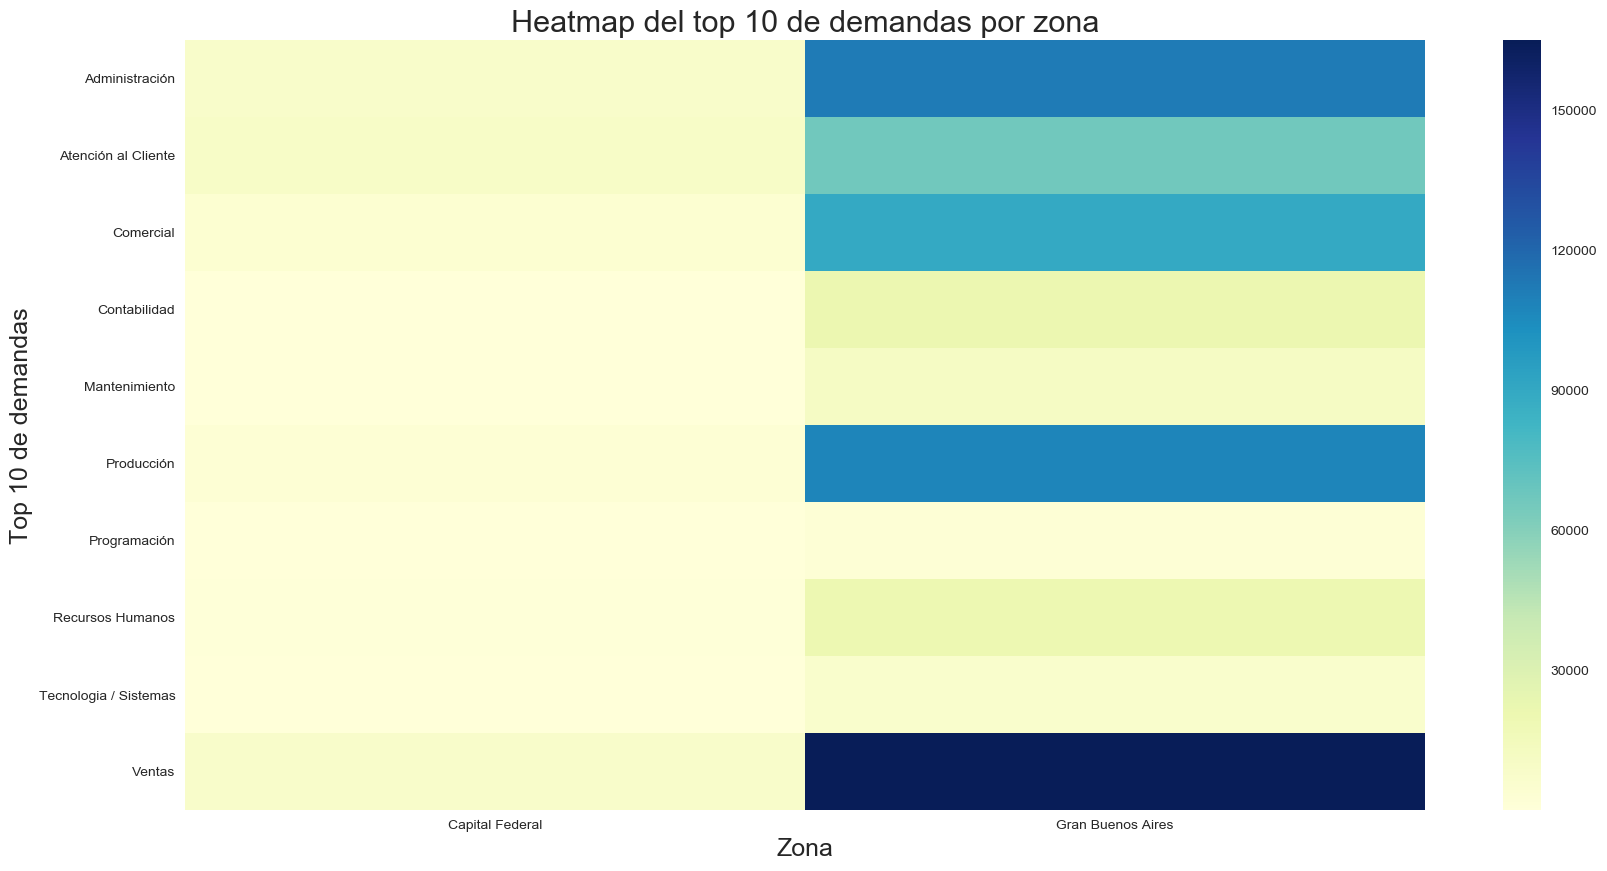

In [24]:
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Heatmap del top 10 de demandas por zona", fontsize=22)
g.set_xlabel("Zona",fontsize=18)
g.set_ylabel("Top 10 de demandas", fontsize=18)

# Informe

Armado de las entidades:
- Vistas de los postulantes
- Postulaciones que realizan los postulantes

In [50]:
vistas = pd.read_csv('data/fiuba_3_vistas.csv')
columns_rename = {'idpostulante': 'id_postulante', 'idAviso': 'id_aviso', 'timestamp': 'timestamp_vista'}
vistas = vistas.rename(columns=columns_rename)
vistas.head(10)

,id_aviso,timestamp_vista,id_postulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP
5,1112355613,2018-02-23T13:38:23.467-0500,rmdWApz
6,1112346704,2018-02-23T13:38:27.130-0500,Dr6e6Xl
7,1112282610,2018-02-23T13:38:27.670-0500,A3R9GWl
8,1112342544,2018-02-23T13:38:31.601-0500,8M24rbM
9,1112358408,2018-02-23T13:38:32.977-0500,YjrD1ZZ


In [51]:
avisos_detalle = pd.read_csv('data/fiuba_6_avisos_detalle.csv')
columns_rename = {'idpostulante': 'id_postulante', 'idaviso': 'id_aviso'}
avisos_detalle = avisos_detalle.rename(columns=columns_rename)
avisos_detalle.head(10)

,id_aviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL
5,1001135716,1,Vendedor Viajante TUCUMAN/SANTIAGO DEL ESTERO,<p>Somos una empresa multinacional que opera e...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A
6,1001326344,1,Vendedor Viajante RECONQUISTA/AVELLANEDA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Ventas,Wurth Argentina S.A
7,1001455648,1,Vendedor Viajante PILAR / ESCOBAR/TIGRE,<p>Somos una empresa multinacional que opera e...,Gran Buenos Aires,NaN,NaN,Full-time,Junior,Ventas,Wurth Argentina S.A
8,9240880,1,"Productores Asesores Independiente, para venta...",Agente\r\noficial Selecciona:</span></strong><...,Capital Federal,Buenos Aires,NaN,Full-time,Jefe / Supervisor / Responsable,Comercial,Agencia Oficial Alejandro Arizaga
9,1001202662,1,"promotor/a , asesor/a",<p>En Cerantola nos encontramos en la busqueda...,Gran Buenos Aires,NaN,NaN,Full-time,Otro,Atención al Cliente,cerantola


In [62]:
postulantes_genero_edad = pd.read_csv('data/fiuba_2_postulantes_genero_y_edad.csv')


,id_postulante,fecha_nacimiento,genero
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC
5,Ez8J,1968-12-18,MASC
6,aOQq,1966-07-16,MASC
7,8BkL,1976-07-21,FEM
8,1d2B,1976-02-28,MASC
9,NPBx,1981-03-09,MASC


In [74]:
def get_year_of_birth(postulantes_genero_edad):
    return (pd.to_datetime
            (postulantes_genero_edad['fecha_nacimiento'], errors='coerce', format='%Y-%m-%d')
            .dt.year)

def get_age(yearOfBirth):
    return 2018 - yearOfBirth
    
def get_age_range(yearOfBirth):
    age = get_age(yearOfBirth)
    if(age<25): return 'Entre 18 y 24'
    if(age<30): return 'Entre 25 y 30'
    if(age<35): return 'Entre 30 y 35'
    if(age<40): return 'Entre 35 y 40'
    if(age<45): return 'Entre 40 y 45'
    if(age<50): return 'Entre 45 y 50'
    return 'Mayor de 50'

postulantes_genero_edad['año_nacimiento_postulante']=get_year_of_birth(postulantes_genero_edad)
postulantes_genero_edad['edad_postulante']=postulantes_genero_edad['año_nacimiento_postulante'].map(get_age, na_action=None)
postulantes_genero_edad['rango_edad_postulante']=postulantes_genero_edad['año_nacimiento_postulante'].map(get_age_range, na_action=None)

In [78]:
columns_rename = {'idpostulante': 'id_postulante', 'fechanacimiento': 'fecha_nacimiento', 'sexo': 'genero'}
postulantes_genero_edad = postulantes_genero_edad.rename(columns=columns_rename)
postulantes_genero_edad.head(10)

,id_postulante,fecha_nacimiento,genero,año_nacimiento_postulante,edad_postulante,rango_edad_postulante
0,NM5M,1970-12-03,FEM,1970.0,48.0,Entre 45 y 50
1,5awk,1962-12-04,FEM,1962.0,56.0,Mayor de 50
2,ZaO5,1978-08-10,FEM,1978.0,40.0,Entre 40 y 45
3,NdJl,1969-05-09,MASC,1969.0,49.0,Entre 45 y 50
4,eo2p,1981-02-16,MASC,1981.0,37.0,Entre 35 y 40
5,Ez8J,1968-12-18,MASC,1968.0,50.0,Mayor de 50
6,aOQq,1966-07-16,MASC,1966.0,52.0,Mayor de 50
7,8BkL,1976-07-21,FEM,1976.0,42.0,Entre 40 y 45
8,1d2B,1976-02-28,MASC,1976.0,42.0,Entre 40 y 45
9,NPBx,1981-03-09,MASC,1981.0,37.0,Entre 35 y 40


In [79]:
vistas_postulantes = pd.merge(postulantes_genero_edad, vistas, on='id_postulante', how='inner') 
vistas_postulantes = pd.merge(vistas_postulantes, avisos_detalle, on='id_aviso', how='inner')
vistas_postulantes.head()

,id_postulante,fecha_nacimiento,genero,año_nacimiento_postulante,edad_postulante,rango_edad_postulante,id_aviso,timestamp_vista,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,5awk,1962-12-04,FEM,1962.0,56.0,Mayor de 50,1112315188,2018-02-28T15:53:48.610-0500,1,Responsable Administrativo Contable,"<p style=""""><span style="""">Se requiere 3 / 4 a...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Contabilidad,Vinculos Consultores en RRHH
1,5awk,1962-12-04,FEM,1962.0,56.0,Mayor de 50,1112315188,2018-02-28T16:14:05.411-0500,1,Responsable Administrativo Contable,"<p style=""""><span style="""">Se requiere 3 / 4 a...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Contabilidad,Vinculos Consultores en RRHH
2,5awk,1962-12-04,FEM,1962.0,56.0,Mayor de 50,1112315188,2018-02-28T16:14:04.673-0500,1,Responsable Administrativo Contable,"<p style=""""><span style="""">Se requiere 3 / 4 a...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Contabilidad,Vinculos Consultores en RRHH
3,5Doak,1976-03-12,MASC,1976.0,42.0,Entre 40 y 45,1112315188,2018-02-27T08:08:40.900-0500,1,Responsable Administrativo Contable,"<p style=""""><span style="""">Se requiere 3 / 4 a...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Contabilidad,Vinculos Consultores en RRHH
4,eXvVo2,1980-07-26,FEM,1980.0,38.0,Entre 35 y 40,1112315188,2018-02-27T12:09:03.304-0500,1,Responsable Administrativo Contable,"<p style=""""><span style="""">Se requiere 3 / 4 a...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Contabilidad,Vinculos Consultores en RRHH


In [57]:
len(vistas_postulantes)

961897

In [58]:
len(vistas)

961897

In [80]:
columns_rename = {'fecha_nacimiento': 'fecha_nacimiento_postulante', 'genero': 'genero_postulante', 'idpais': 'id_pais_aviso', 'titulo':'titulo_aviso', 'descripcion':'descripcion_aviso', 'nombre_zona':'nombre_zona_aviso', 'ciudad':'ciudad_aviso', 'mapacalle':'mapa_calle_aviso', 'tipo_de_trabajo': 'tipo_de_trabajo_aviso', 'nivel_laboral':'nivel_laboral_aviso', 'nombrea_area':'nombrea_area_aviso', 'denominacion_empresa':'denominacion_empresa_aviso'}
vistas_postulantes = vistas_postulantes.rename(columns=columns_rename)
vistas_postulantes.head()

,id_postulante,fecha_nacimiento_postulante,genero_postulante,año_nacimiento_postulante,edad_postulante,rango_edad_postulante,id_aviso,timestamp_vista,id_pais_aviso,titulo_aviso,descripcion_aviso,nombre_zona_aviso,ciudad_aviso,mapa_calle_aviso,tipo_de_trabajo_aviso,nivel_laboral_aviso,nombre_area,denominacion_empresa_aviso
0,5awk,1962-12-04,FEM,1962.0,56.0,Mayor de 50,1112315188,2018-02-28T15:53:48.610-0500,1,Responsable Administrativo Contable,"<p style=""""><span style="""">Se requiere 3 / 4 a...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Contabilidad,Vinculos Consultores en RRHH
1,5awk,1962-12-04,FEM,1962.0,56.0,Mayor de 50,1112315188,2018-02-28T16:14:05.411-0500,1,Responsable Administrativo Contable,"<p style=""""><span style="""">Se requiere 3 / 4 a...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Contabilidad,Vinculos Consultores en RRHH
2,5awk,1962-12-04,FEM,1962.0,56.0,Mayor de 50,1112315188,2018-02-28T16:14:04.673-0500,1,Responsable Administrativo Contable,"<p style=""""><span style="""">Se requiere 3 / 4 a...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Contabilidad,Vinculos Consultores en RRHH
3,5Doak,1976-03-12,MASC,1976.0,42.0,Entre 40 y 45,1112315188,2018-02-27T08:08:40.900-0500,1,Responsable Administrativo Contable,"<p style=""""><span style="""">Se requiere 3 / 4 a...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Contabilidad,Vinculos Consultores en RRHH
4,eXvVo2,1980-07-26,FEM,1980.0,38.0,Entre 35 y 40,1112315188,2018-02-27T12:09:03.304-0500,1,Responsable Administrativo Contable,"<p style=""""><span style="""">Se requiere 3 / 4 a...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Contabilidad,Vinculos Consultores en RRHH


In [81]:
vistas_mujeres=vistas_postulantes[vistas_postulantes['genero_postulante']=='FEM']

In [82]:
for_heatmap = vistas_mujeres.pivot_table(index='rango_edad_postulante', columns='tipo_de_trabajo_aviso', values='id_aviso', aggfunc='count')
for_heatmap

tipo_de_trabajo_aviso,Fines de Semana,Full-time,Part-time,Pasantia,Por Contrato,Por Horas,Primer empleo,Teletrabajo,Temporario
rango_edad_postulante,,,,,,,,,
Entre 18 y 24,230.0,125334.0,31965.0,1381.0,92.0,910.0,1.0,423.0,395.0
Entre 25 y 30,225.0,138255.0,21156.0,741.0,95.0,767.0,NaN,424.0,447.0
Entre 30 y 35,129.0,85402.0,11332.0,239.0,106.0,432.0,NaN,266.0,291.0
Entre 35 y 40,60.0,48108.0,5946.0,86.0,51.0,368.0,NaN,146.0,156.0
Entre 40 y 45,31.0,27367.0,3210.0,57.0,16.0,186.0,NaN,64.0,79.0
Entre 45 y 50,11.0,14301.0,1462.0,15.0,19.0,97.0,NaN,35.0,34.0
Mayor de 50,24.0,12456.0,1882.0,26.0,17.0,88.0,NaN,31.0,25.0


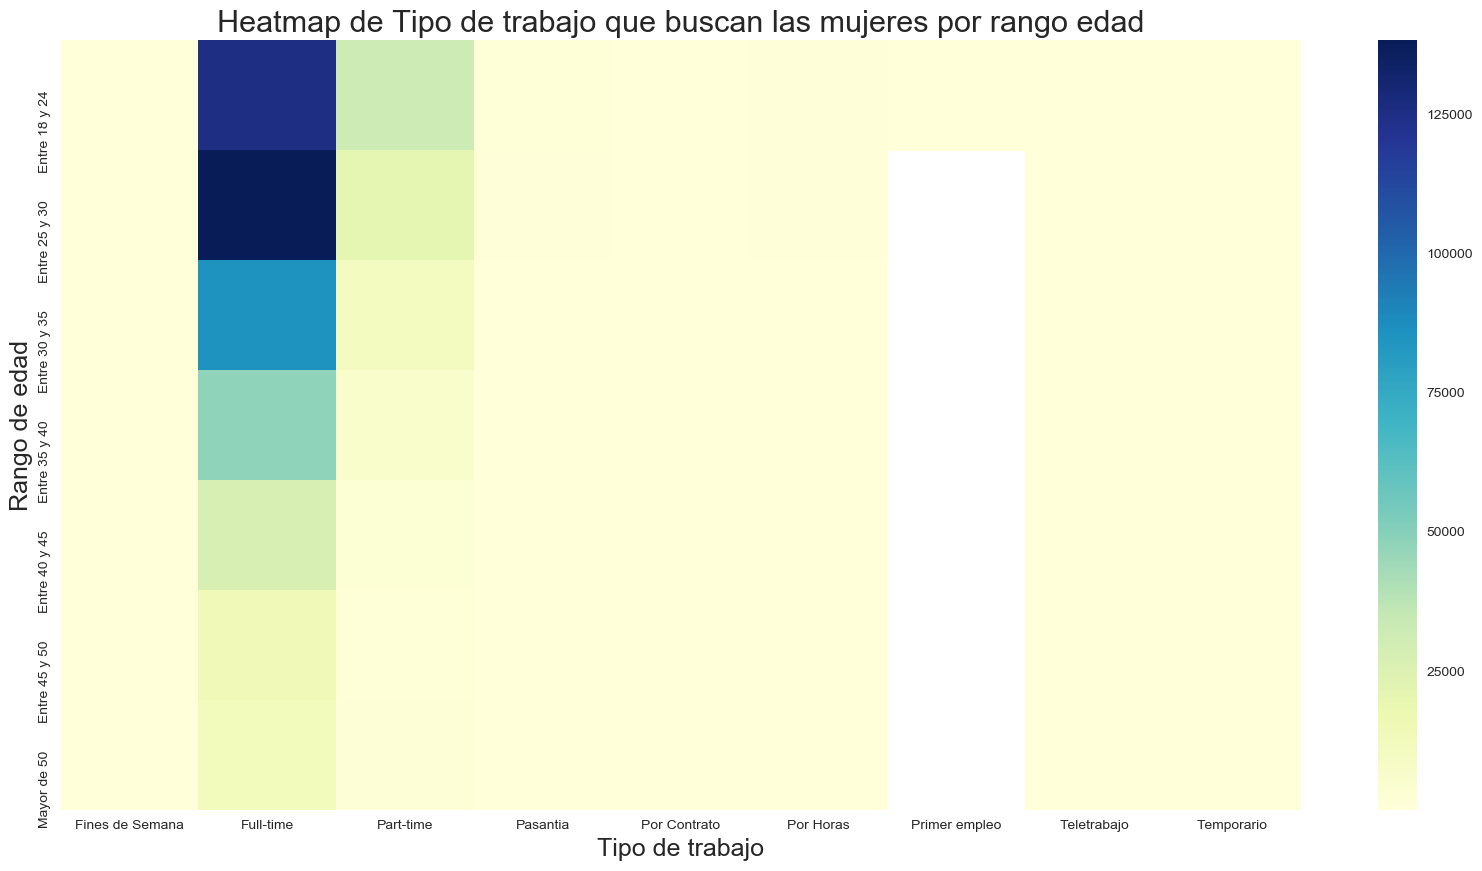

In [83]:
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Heatmap de Tipo de trabajo que buscan las mujeres por rango edad", fontsize=22)
g.set_xlabel("Tipo de trabajo",fontsize=18)
g.set_ylabel("Rango de edad", fontsize=18)

In [87]:
vistas_hombres=vistas_postulantes[vistas_postulantes['genero_postulante']=='MASC']

In [88]:
for_heatmap_masc = vistas_hombres.pivot_table(index='rango_edad_postulante', columns='tipo_de_trabajo_aviso', values='id_aviso', aggfunc='count')
for_heatmap_masc

tipo_de_trabajo_aviso,Fines de Semana,Full-time,Part-time,Pasantia,Por Contrato,Por Horas,Primer empleo,Teletrabajo,Temporario
rango_edad_postulante,,,,,,,,,
Entre 18 y 24,42.0,74579.0,12867.0,900.0,47.0,696.0,1.0,461.0,365.0
Entre 25 y 30,38.0,95849.0,8019.0,574.0,68.0,676.0,NaN,417.0,545.0
Entre 30 y 35,17.0,77188.0,4268.0,148.0,97.0,451.0,NaN,232.0,321.0
Entre 35 y 40,4.0,48476.0,2053.0,56.0,46.0,233.0,NaN,212.0,228.0
Entre 40 y 45,7.0,30003.0,1228.0,30.0,22.0,129.0,NaN,86.0,98.0
Entre 45 y 50,NaN,17991.0,697.0,10.0,21.0,68.0,NaN,54.0,89.0
Mayor de 50,NaN,20665.0,746.0,14.0,12.0,49.0,NaN,66.0,60.0


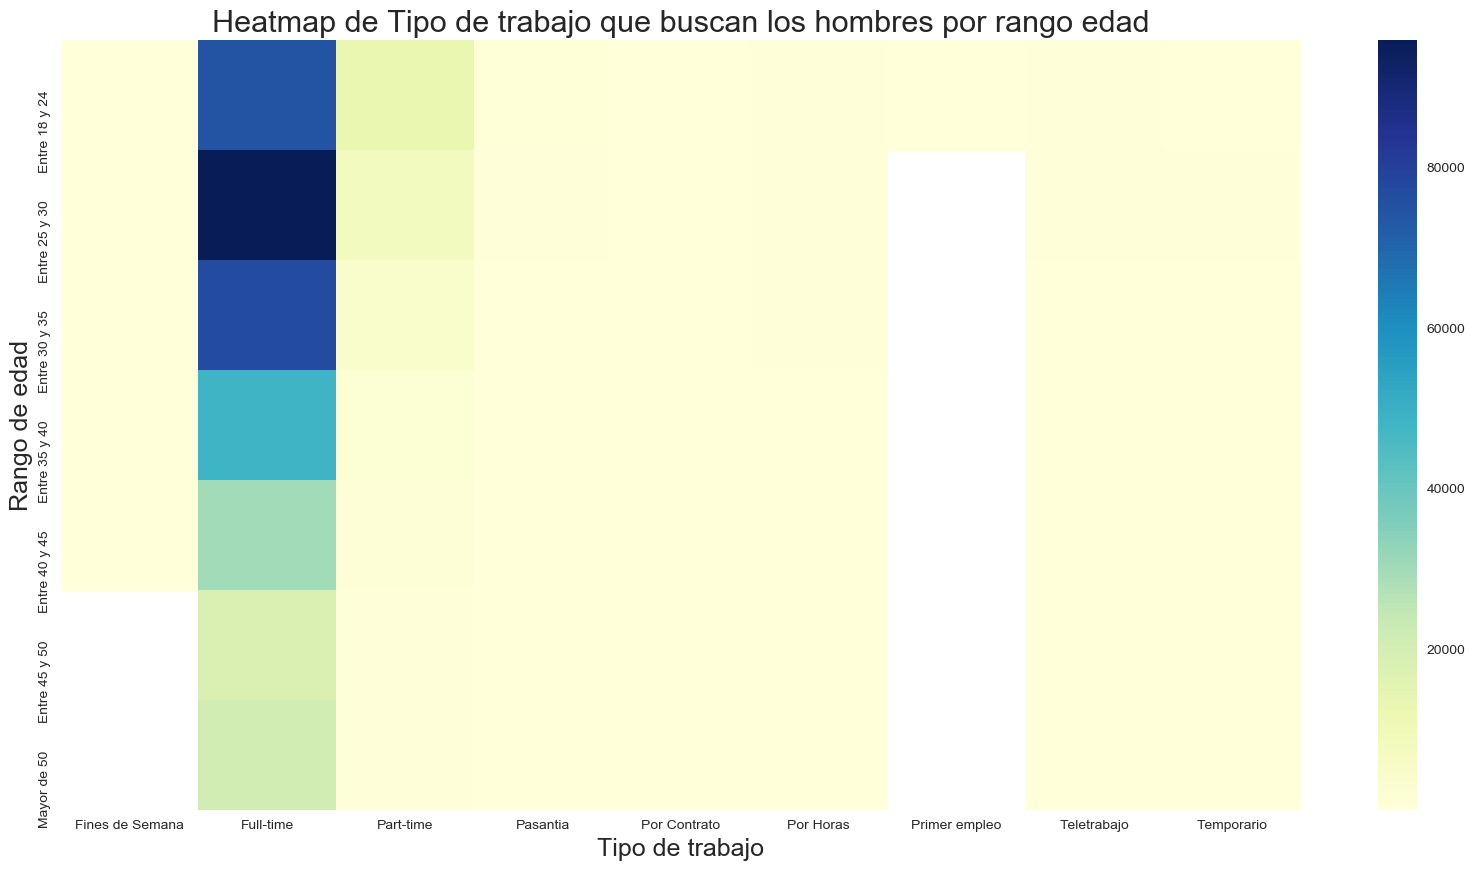

In [89]:
g = sns.heatmap(for_heatmap_masc,  cmap="YlGnBu")
g.set_title("Heatmap de Tipo de trabajo que buscan los hombres por rango edad", fontsize=22)
g.set_xlabel("Tipo de trabajo",fontsize=18)
g.set_ylabel("Rango de edad", fontsize=18)

In [97]:
#ggplot(vistas_mujeres, aes('rango_edad_postulante', fill='tipo_de_trabajo_aviso'))
ggplot(aes(x='rango_edad_postulante', fill='tipo_de_trabajo_aviso'), data=vistas_mujeres) + \
     geom_bar()

TypeError: 'module' object is not callable